# Univariate Modelling

In [1]:
import os
import joblib
import pandas as pd

stored_models = [file for file in os.listdir() if file.endswith('.model.pkl')]
stored_models

['XGBRegressor.model.pkl',
 'ExtraTreesRegressor.model.pkl',
 'BaggingRegressor.model.pkl']

In [2]:
from sklearn.ensemble import VotingRegressor

estimators = []
for model_file in stored_models:
    print(f'Loading {model_file}')
    model = joblib.load(model_file)
    estimators.append((
        model_file.replace('.model.pkl', ''),
        model
    ))

estimators

Loading XGBRegressor.model.pkl
Loading ExtraTreesRegressor.model.pkl
Loading BaggingRegressor.model.pkl


[('XGBRegressor',
  XGBRegressor(alpha=10.0, base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=0.4206760895148529, device=None,
               early_stopping_rounds=None, enable_categorical=False,
               eval_metric=None, feature_types=None, gamma=0, grow_policy=None,
               importance_type=None, interaction_constraints=None, lambda=10.0,
               learning_rate=0.08152235806502967, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=15, max_leaves=None,
               min_child_weight=10, missing=nan, monotone_constraints=None,
               multi_strategy=None, n_estimators=918, n_jobs=None, ...)),
 ('ExtraTreesRegressor', ExtraTreesRegressor()),
 ('BaggingRegressor',
  BaggingRegressor(estimator=DecisionTreeRegressor(), max_samples=0.5,
                   n_estimators=100))]

In [3]:
# Load, preprocess and standardize the train data 
from pipelines import pipeline

data_file = os.path.join('..', '..', '..', '..', 'data', 'raw', 'train.csv')
train_data = pd.read_csv(data_file, index_col=0, low_memory=False)
train_data = pipeline.fit_transform(train_data)

X_train = train_data.drop(columns=['bg+1:00'])
y_train = train_data['bg+1:00']

ensemble = VotingRegressor(estimators=estimators, verbose=True)
ensemble.fit(X=X_train, y=y_train)
ensemble.score(X=X_train, y=y_train)

[Voting] ............. (1 of 3) Processing XGBRegressor, total=  30.1s
[Voting] ...... (2 of 3) Processing ExtraTreesRegressor, total= 2.3min
[Voting] ......... (3 of 3) Processing BaggingRegressor, total= 5.5min


0.9814384883958275

# Prepare test results

In [4]:
test_file = os.path.join('..', '..', '..', '..', 'data', 'raw', 'test.csv')

In [5]:
## Load the test data
test_data = pd.read_csv(test_file, index_col=0)
test_data.head()

,p_num,time,bg-5:55,bg-5:50,bg-5:45,bg-5:40,bg-5:35,bg-5:30,bg-5:25,bg-5:20,...,activity-0:45,activity-0:40,activity-0:35,activity-0:30,activity-0:25,activity-0:20,activity-0:15,activity-0:10,activity-0:05,activity-0:00
id,,,,,,,,,,,,,,,,,,,,,
p01_8459,p01,06:45:00,NaN,9.2,NaN,NaN,10.2,NaN,NaN,10.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
p01_8460,p01,11:25:00,NaN,NaN,9.9,NaN,NaN,9.4,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Walk,Walk,Walk
p01_8461,p01,14:45:00,NaN,5.5,NaN,NaN,5.5,NaN,NaN,5.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
p01_8462,p01,04:30:00,NaN,3.4,NaN,NaN,3.9,NaN,NaN,4.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
p01_8463,p01,04:20:00,NaN,NaN,8.3,NaN,NaN,10.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
from pipelines import pipeline

test_data = pipeline.fit_transform(test_data)
test_data.head()

,bg-5:45,bg-5:30,bg-5:15,bg-5:00,bg-4:45,bg-4:30,bg-4:15,bg-4:00,bg-3:45,bg-3:30,...,insulin-1:00,insulin-0:45,insulin-0:30,insulin-0:15,insulin-0:00,day_phase_evening,day_phase_late_evening,day_phase_morning,day_phase_night,day_phase_noon
id,,,,,,,,,,,,,,,,,,,,,
p01_8459,0.207342,0.428776,0.444301,0.576337,1.067296,1.603953,1.927507,1.801464,1.599203,1.337164,...,-0.250380,-0.277360,-0.296777,-0.264692,-0.168140,0,0,1,0,0
p01_8460,0.317146,0.176649,0.087778,-0.159542,-0.341861,-0.309278,-0.338503,-0.517556,-0.521536,-0.638588,...,-0.250380,-0.258531,1.540202,-0.236812,-0.150734,0,0,0,0,1
p01_8461,-1.000500,-1.033563,-1.104026,-1.117718,-1.138341,-1.129234,-1.244907,-1.330719,-1.215048,-0.819114,...,-0.269306,-0.272652,-0.281779,-0.250752,-0.159437,0,0,0,0,0
p01_8462,-1.579466,-1.406712,-1.317939,-1.508654,-1.587637,-1.453168,-1.335548,-1.350797,-1.586931,-1.671596,...,-0.364392,-0.343600,-0.296898,-0.236812,-0.150734,0,0,0,1,0
p01_8463,-0.161998,0.358181,1.035109,1.220231,1.220466,1.026946,0.779395,0.988301,0.895641,0.564916,...,-0.316735,-0.347797,-0.372128,-0.334727,-0.211864,0,0,0,1,0


In [7]:
# Predict the bg+1:00 values
test_data['bg+1:00'] = ensemble.predict(test_data)
test_data.head()

,bg-5:45,bg-5:30,bg-5:15,bg-5:00,bg-4:45,bg-4:30,bg-4:15,bg-4:00,bg-3:45,bg-3:30,...,insulin-0:45,insulin-0:30,insulin-0:15,insulin-0:00,day_phase_evening,day_phase_late_evening,day_phase_morning,day_phase_night,day_phase_noon,bg+1:00
id,,,,,,,,,,,,,,,,,,,,,
p01_8459,0.207342,0.428776,0.444301,0.576337,1.067296,1.603953,1.927507,1.801464,1.599203,1.337164,...,-0.277360,-0.296777,-0.264692,-0.168140,0,0,1,0,0,8.601400
p01_8460,0.317146,0.176649,0.087778,-0.159542,-0.341861,-0.309278,-0.338503,-0.517556,-0.521536,-0.638588,...,-0.258531,1.540202,-0.236812,-0.150734,0,0,0,0,1,6.651219
p01_8461,-1.000500,-1.033563,-1.104026,-1.117718,-1.138341,-1.129234,-1.244907,-1.330719,-1.215048,-0.819114,...,-0.272652,-0.281779,-0.250752,-0.159437,0,0,0,0,0,6.922387
p01_8462,-1.579466,-1.406712,-1.317939,-1.508654,-1.587637,-1.453168,-1.335548,-1.350797,-1.586931,-1.671596,...,-0.343600,-0.296898,-0.236812,-0.150734,0,0,0,1,0,9.391678
p01_8463,-0.161998,0.358181,1.035109,1.220231,1.220466,1.026946,0.779395,0.988301,0.895641,0.564916,...,-0.347797,-0.372128,-0.334727,-0.211864,0,0,0,1,0,6.618953


## Prepare the submission file

In [8]:
submission = pd.DataFrame(test_data['bg+1:00'])
submission

,bg+1:00
id,
p01_8459,8.601400
p01_8460,6.651219
p01_8461,6.922387
p01_8462,9.391678
p01_8463,6.618953
...,...
p24_256,6.535621
p24_257,8.949698
p24_258,6.151575


### Save the submission file

In [9]:
submission.to_csv(f'submission-{os.path.basename(os.getcwd())}.csv')

## Evaluate the model

RMSE: 0.40823007070983264
R2: 0.9814384883958275


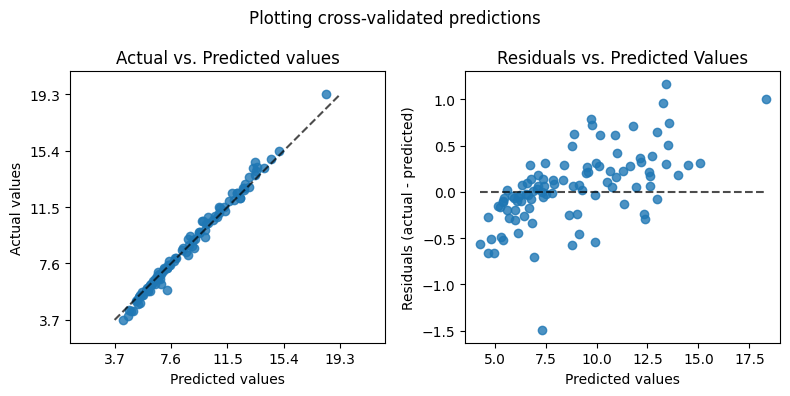

In [10]:
from sklearn.metrics import root_mean_squared_error, r2_score, PredictionErrorDisplay
import matplotlib.pyplot as plt

y_pred = ensemble.predict(X=X_train)
print(f'RMSE: {root_mean_squared_error(y_true=y_train, y_pred=y_pred)}')
print(f'R2: {r2_score(y_true=y_train, y_pred=y_pred)}')

fig, axs = plt.subplots(ncols=2, figsize=(8, 4))
PredictionErrorDisplay.from_predictions(
    y_true=y_train,
    y_pred=y_pred,
    kind="actual_vs_predicted",
    subsample=100,
    ax=axs[0],
    random_state=0,
)
axs[0].set_title("Actual vs. Predicted values")
PredictionErrorDisplay.from_predictions(
    y_true=y_train,
    y_pred=y_pred,
    kind="residual_vs_predicted",
    subsample=100,
    ax=axs[1],
    random_state=0,
)
axs[1].set_title("Residuals vs. Predicted Values")
fig.suptitle("Plotting cross-validated predictions")
plt.tight_layout()
plt.show();